In [25]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D

In [26]:
class Particle():
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id     
    # Method
    def Evolution(self,i):
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits1(self,limits,dim):
        for i in range(dim):
            if (self.r[i] + self.radius > limits[i]) and (self.v[i]>0):
                self.v[i] = - 0.9*self.v[i]
            if (self.r[i] - self.radius < - limits[i]) and (self.v[i]<0):
                self.v[i] = - 0.9*self.v[i]
    def CheckWallLimits2(self,limits,dim):
        for i in range(dim):
            if (self.r[i] + self.radius > limits[i]) and (self.v[i]>0):
                self.v[i] = - self.v[i]
            if (self.r[i] - self.radius < - limits[i]) and (self.v[i]<0):
                self.v[i] = - self.v[i]
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        self.RrVector = np.array([self.rVector[0]]) # initial condition    
        self.RvVector = np.array([self.vVector[0]])
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [27]:
# Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
r0 = np.array([-15., 5.])
v0 = np.array([1., 0.])
a = np.array([0., -9.8])
r=1
Limits1 = np.array([20.,20.])
Limits2 = np.array([10.,10.,10.])

# Parte 1. Falling Ball

In [28]:
P= Particle(r0,v0,a,t,1.,r,1.)
for it in tqdm(range(len(t))): # Evolucion temporal
    P.CheckWallLimits1(Limits1,2)
    P.Evolution(it)

100%|██████████| 3001/3001 [00:00<00:00, 65368.89it/s]


In [29]:
P.ReduceSize(10)
Newt = []
for i in range(len(t)):
    if i%10 == 0:
        Newt.append(t[i])
redt1=np.array(Newt) 

<IPython.core.display.Javascript object>


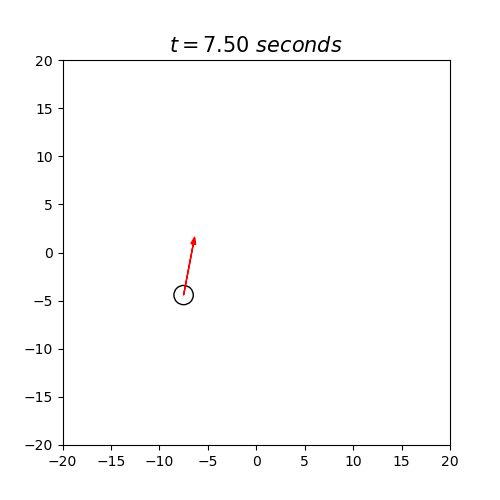

In [30]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(1,1,1)
def init():
    ax1.set_xlim(-Limits1[0],Limits1[0])
    ax1.set_ylim(-Limits1[1],Limits1[1])
def Update(i):
    plot = ax1.clear()
    init()
    plot = ax1.set_title(r'$t=%.2f \ seconds$' %(redt1[i]), fontsize=15)
    x = P.GetRPositionVector()[i,0]
    y = P.GetRPositionVector()[i,1]
    vx = P.GetRVelocityVector()[i,0]
    vy = P.GetRVelocityVector()[i,1]
    circle = plt.Circle( (x,y), P.GetR(), color='k', fill=False)
    plot = ax1.add_patch(circle)
    plot = ax1.arrow(x,y,vx,vy,color='r',head_width=0.5)
    return plot
Animation = anim.FuncAnimation(fig1,Update,frames=len(redt1),init_func=init)

In [16]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=1000, metadata=dict(artist='Me'))

RuntimeError: Requested MovieWriter (ffmpeg) not available

a) La pelota en dejar de rebotar 29.50 segundos aparentemente.
$\newline$ b) Energía Mecanica en función del tiempo.

<IPython.core.display.Javascript object>


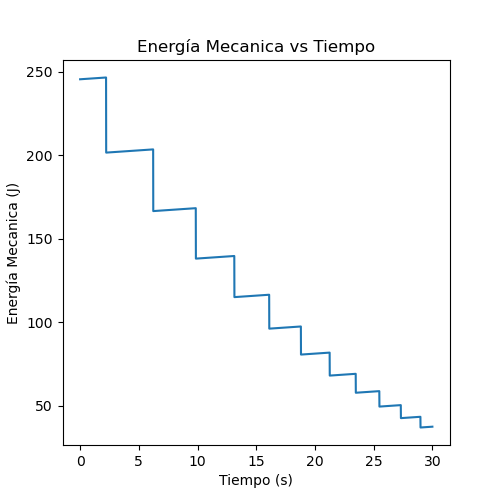

Text(0.5, 1.0, 'Energía Mecanica vs Tiempo')

In [17]:
ME=0.5*1*((P.GetVelocityVector()[:,0]**2)+(P.GetVelocityVector()[:,1]**2)) +1*9.8*abs(P.GetPositionVector()[:,1]+20)
fig2 = plt.figure(figsize=(5,5))
plt.plot(t,ME)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Mecanica (J)")
plt.title("Energía Mecanica vs Tiempo")

# Parte 2. Gas 3D

In [18]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [19]:
def RunSimulation(t,NParticles , Velo):
    Particles = GetParticles(NParticles,Limits2[0],Velo = Velo,dt=dt)
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits2(Limits2,3)
            Particles[i].Evolution(it)    
    return Particles
Particles = RunSimulation(t,100, 6)

100%|██████████| 3001/3001 [00:03<00:00, 918.57it/s]


In [22]:
def ReduceTime(t,factor):
    for p in Particles:
        p.ReduceSize(factor)
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
    return np.array(Newt)
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


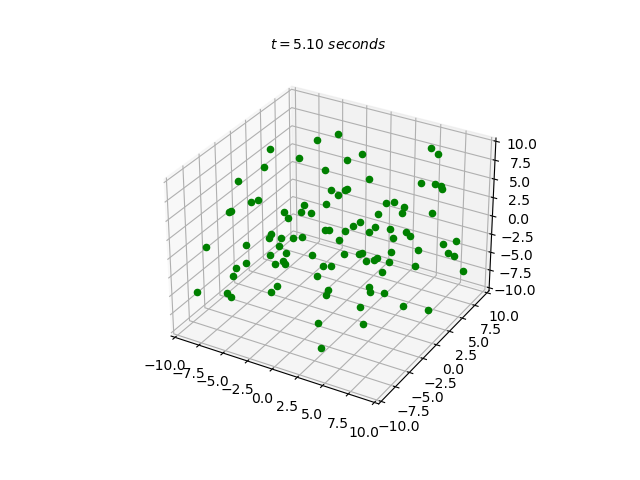

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def h():
    ax.set_xlim(-Limits2[0],Limits2[0])
    ax.set_ylim(-Limits2[1],Limits2[1])
    ax.set_zlim(-Limits2[2],Limits2[2])

def Update2(i):
    plot = ax.clear()
    h()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=10)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        plot = ax.scatter3D( x,y,z , c='g') 
    return plot
ax.set_xlim3d([-Limits2[0],Limits2[0] ])
ax.set_xlabel('X')

ax.set_ylim3d([-Limits2[1], Limits2[1]])
ax.set_ylabel('Y')

ax.set_zlim3d([-Limits2[2], Limits2[2]])
ax.set_zlabel('Z')

Animation = anim.FuncAnimation(fig,Update2,frames=len(redt),init_func=h)

In [24]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=70, metadata=dict(artist='Me'))

RuntimeError: Requested MovieWriter (ffmpeg) not available